# Lernen aus Erfahrung

Gegeben sei 1 Urne mit 4 Kugeln. Es ist lediglich bekannt, dass die Urne entweder

* 1 rote und 3 schwarze ($B_1$) Kugeln,
* 2 rote und 2 schwarze ($B_2$) Kugeln oder
* 3 rote und 1 schwarze ($B_3$) Kugel

enthält (apriori-Wahrscheinlichkeiten $P(B_i)>0$, z.B. $P(B_i) = 1/3$).

Wenn nun bei $n$-maligem Ziehen mit Zurücklegen rote bzw. schwarze Kugeln gezogen werden ($A$), was bedeutet dies für die aposteriori-Wahrscheinlichkeiten $P(B_i|A)$?

Nach dem Satz von Bayes gilt
$$ P(B_i | A) = \frac{ P(A | B_i) \cdot P(B_i)}{P(A)} = \frac{ P(A | B_i) \cdot P(B_i)}{P(A | B_1)P(B_1) + P(A | B_2)P(B_2)+ P(A | B_3)P(B_3)} $$

In [1]:
from random import random

class Wfkt(object):
    # simuliert eine Wahrscheinlichkeitsfunktion
    
    def __init__(self, wahrscheinlichkeiten, name):
        self.wahrscheinlichkeiten = wahrscheinlichkeiten
        self.name = name
        
    def __getitem__(self, merkmal):
        return self.wahrscheinlichkeiten.get(merkmal, 0)
    
    def X(self):
        # Zufallsvariable
        r = random()  # Zufallszahl in [0,1[
        s = 0.0
        for m, p in self.wahrscheinlichkeiten.items():
            s += p
            if r <= s: return m
            
    def ausgabe(self):
        print("Wahrscheinlichkeit   Merkmal")
        print("----------------------------")
        for m in sorted(self.wahrscheinlichkeiten):
            print('{0:18.2f}   {1:s}'.format(self.wahrscheinlichkeiten[m], str(m)))


In [2]:
B1 = Wfkt({'r':0.25, 's':0.75}, 'B1')
B2 = Wfkt({'r':0.5, 's':0.5}, 'B2')
B3 = Wfkt({'r':0.75, 's':0.25}, 'B3')

B1.ausgabe()

Wahrscheinlichkeit   Merkmal
----------------------------
              0.25   r
              0.75   s


In [3]:
# Beispiel: Wir ziehen 20 mal aus Urne B1
print([B1.X() for _ in range(20)])

['r', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'r', 's', 's', 's', 's', 'r', 's', 'r', 's', 's']


In [4]:
# Beispie: Für Urne B1 ist P('r')
print("P('r') = %.02f" % B1['r'])

P('r') = 0.25


In [5]:
class Bayes(object):
    # diese Klasse berechnet die Auswirkung von Beobachtungen auf apriori-Hypothesen
    
    def __init__(self, hypothesen):
        self.hypothesen = hypothesen
        
    def beobachtung(self, daten, zeige_entwicklung = False):
        for d in daten:
            pa = sum([hypo[d] * self.hypothesen[hypo] for hypo in self.hypothesen.keys()])  # P(A)
            for hypo in self.hypothesen.keys():
                self.hypothesen[hypo] = hypo[d] * self.hypothesen[hypo] / pa   # P(A|B_i) * P(B_i) / P(A)
            if zeige_entwicklung == True:
                print('Beobachtung:', d)
                self.ausgabe()
                
    def ausgabe(self):
        print("Wahrscheinlichkeit   Hypothese")
        print("----------------------------")
        for hypos in sorted(self.hypothesen.keys(), key=lambda x: x.name):
            print('{0:18.2f}   {1:s}'.format(self.hypothesen[hypos], hypos.name))
            
    def get(self):
        return [[self.hypothesen[hypos], hypos.name] for hypos in sorted(self.hypothesen.keys(), key=lambda x: x.name)]


## Beispiel 

Wir nehmen an, dass jede Urne mit der Wahrscheinlichkeit 1/3 vor uns steht.

Nun beobachten wir das Ziehen einer roten Kugel 'r', Ereignis A.

Für die aposterio-Wahrscheinlichkeit, dass die Urne $B_1$ vor uns steht bedeutet das

$$ P(B_1 | A) = \frac{ P(A | B_1) \cdot P(B_1)}{P(A | B_1)P(B_1) + P(A | B_2)P(B_2) + P(A | B_3)P(B_3)} 
              = \frac{0.25 * 0.\overline 3}{0.25 * 0.\overline 3 + 0.5 * 0.\overline 3 + 0.75 * 0.\overline 3} = 0.1\overline 6$$
              
Nach der Rechnung ist $P(B_1 | A)$ die neue apriori-Wahrscheinlichkeit $P(B_1)$.

In [6]:
# Beispiel: Alle Urnen sind gleichwahrscheinlich, und wir Beobachten 'r'
urnen = Bayes({B1: 1/3, B2: 1/3, B3: 1/3})
print("Annahmen vor der Beobachtung")
urnen.ausgabe()
urnen.beobachtung(['r'])
print("\n\nAnnahmen nach der Beobachtung einer roten Kugel")
urnen.ausgabe()

Annahmen vor der Beobachtung
Wahrscheinlichkeit   Hypothese
----------------------------
              0.33   B1
              0.33   B2
              0.33   B3


Annahmen nach der Beobachtung einer roten Kugel
Wahrscheinlichkeit   Hypothese
----------------------------
              0.17   B1
              0.33   B2
              0.50   B3


## Beispiel

Wir simulieren das Vorliegen von Urne $B_1$, aus der wir 10-mal ziehen.

Wir wollen analysieren, wie sich unsere Hypothesen mit dem Ziehen verändern.

In [7]:
# Wir simulieren das Vorliegen von Urne B1
urnen = Bayes({B1: 1/3, B2: 1/3, B3: 1/3})
print("Annahmen vor der Beobachtung")
urnen.ausgabe()

beobachtungen = [B1.X() for _ in range(30)]
print('\n\nBeobachtungen:', beobachtungen)
print()

urnen.beobachtung(beobachtungen, False)
print("\nAnnahmen nach der Beobachtung")
urnen.ausgabe()

Annahmen vor der Beobachtung
Wahrscheinlichkeit   Hypothese
----------------------------
              0.33   B1
              0.33   B2
              0.33   B3


Beobachtungen: ['s', 's', 's', 's', 'r', 's', 's', 's', 's', 'r', 's', 's', 'r', 'r', 's', 'r', 's', 's', 's', 'r', 's', 'r', 'r', 's', 'r', 's', 's', 's', 's', 's']


Annahmen nach der Beobachtung
Wahrscheinlichkeit   Hypothese
----------------------------
              0.91   B1
              0.09   B2
              0.00   B3


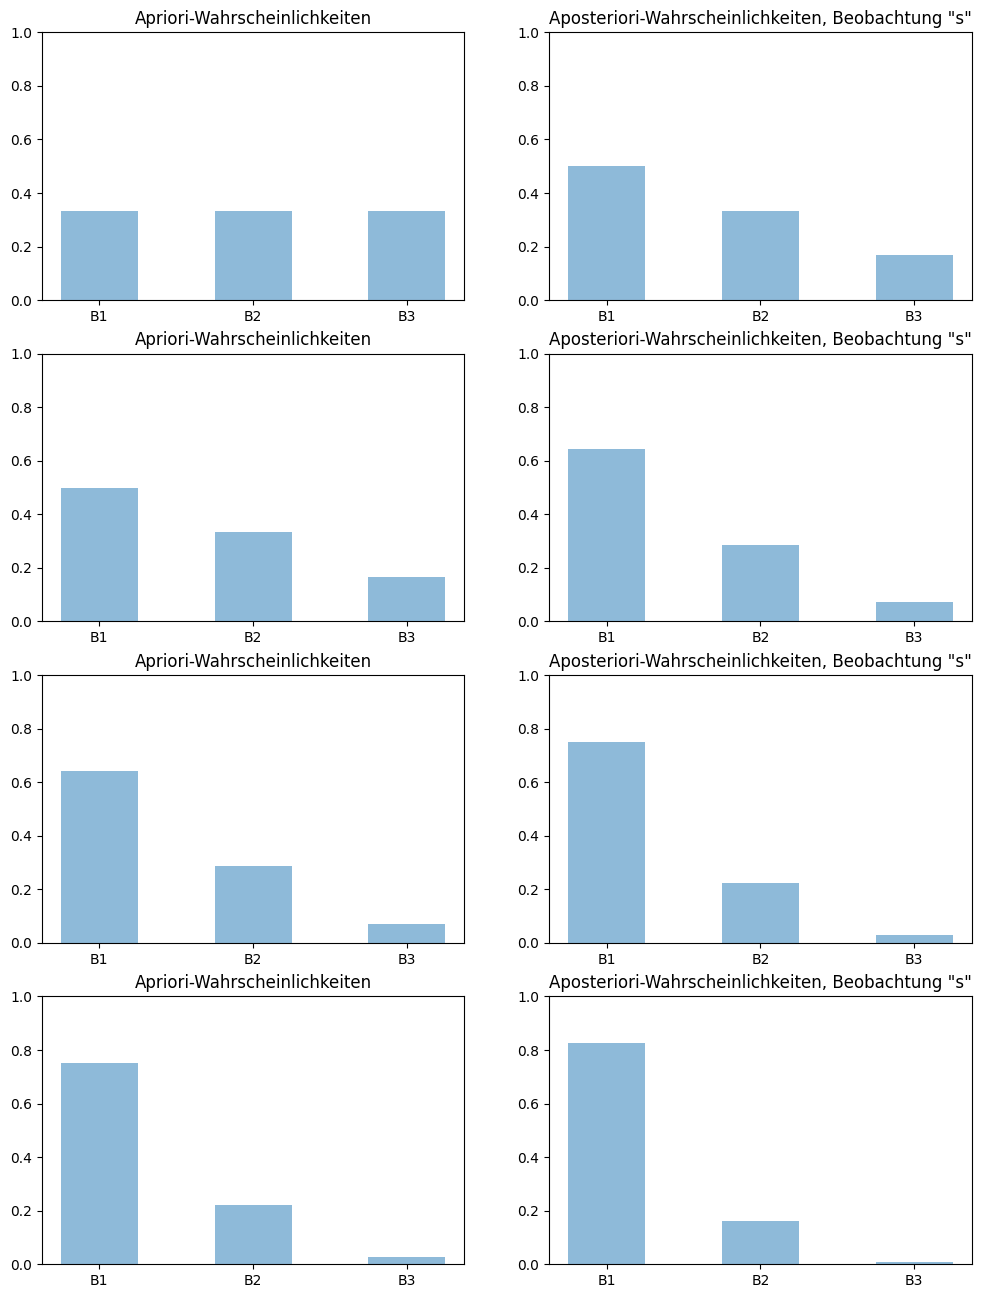

In [8]:
import matplotlib.pyplot as plt
# Wir simulieren das Vorliegen von Urne B1
urnen = Bayes({B1: 1/3, B2: 1/3, B3: 1/3})
beobachtungen = [B1.X() for _ in range(4)]
fig, axes = plt.subplots(len(beobachtungen), 2, figsize=(12,4*len(beobachtungen)))
for b, i in zip(beobachtungen, range(len(beobachtungen))):
    apriori = urnen.get()
    urnen.beobachtung(b, False)
    aposteriori = urnen.get()
    y, names = zip(*apriori)
    axes[i][0].bar(range(len(y)), y, align="center", tick_label=names, width=0.5, alpha=0.5)
    axes[i][0].set_title('Apriori-Wahrscheinlichkeiten')
    axes[i][0].set_ylim(0,1)
    y, names = zip(*aposteriori)
    axes[i][1].bar(range(len(y)), y, align="center", tick_label=names, width=0.5, alpha=0.5)
    axes[i][1].set_title('Aposteriori-Wahrscheinlichkeiten, Beobachtung "%s"' % b)
    axes[i][1].set_ylim(0,1)    